<a href="https://colab.research.google.com/github/Endo12/Heart-Failutre-Prediction/blob/main/Big_Think_Final_Project_Soham_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Methods for Predicting Heart Failure - Soham N
### BigTh!nk AI Spring 2022
Data from https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?resource=download

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress as lr
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

IMPORTANT: Please be sure to make your own copy of the notebook before running anything!

# Data Collection
In order to train a model, you first need data. Load in the requisite CSVs here.

In [23]:
### DO NOT MODIFY THIS CELL ###
!git clone https://github.com/BigThinkAI/spring2022-project-data.git

TRAIN_CSV = '/content/spring2022-project-data/heart_failure_train.csv'
TEST_CSV = '/content/spring2022-project-data/heart_failure_test.csv'

fatal: destination path 'spring2022-project-data' already exists and is not an empty directory.


In [24]:
# Your code here
data = pd.read_csv(TRAIN_CSV)
valid = pd.read_csv(TEST_CSV)

# Feature Engineering
In this part, you want to explore the data your given and see what features you can extract that will be useful for prediction.

In [25]:
# Your code here
data = data.rename(columns={'Unnamed: 0':'id'})
data.head()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,85.0,0,212,0,38,0,186000.0,0.9,136,1,0,187,0
1,1,52.0,0,3966,0,40,0,325000.0,0.9,140,1,1,146,0
2,2,45.0,0,308,1,60,1,377000.0,1.0,136,1,0,186,0
3,3,55.0,0,66,0,40,0,203000.0,1.0,138,1,0,233,0
4,4,60.0,0,1896,1,25,0,365000.0,2.1,144,0,0,172,1


Here, we check the correlation between all the variables. Notice that id and time, in particular, are bad at predicting death.

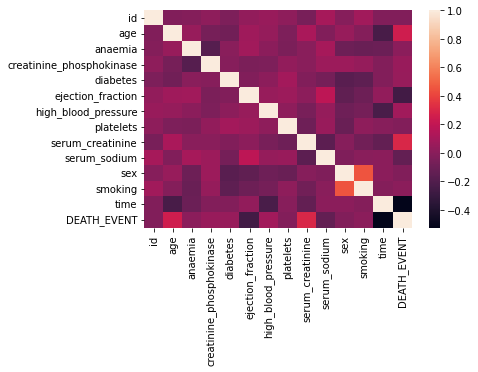

In [26]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

But first let's check our dependent variable. Here, we notice that we have more than double the samples for no death as opposed to death. This is important, as it means we have unbalanced sampling. We will have to correct this later on.

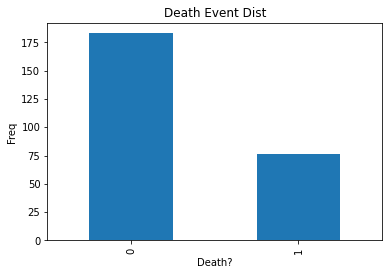

In [27]:
data['DEATH_EVENT'].value_counts().plot(kind='bar', title="Death Event Dist", ylabel="Freq", xlabel="Death?")

Now let's start checking the variables from above. First, plotting id by Death reveals that id is a terrible predictor of death. This makes sense, as unique identification for our benefit has nothing to do with observed variables. We'll have to remember to remove this variable when analyzing.

Slope =  -0.00018856065367693276 
R^2 =  0.0009586251178843021 
P Val =  0.6199016792441308


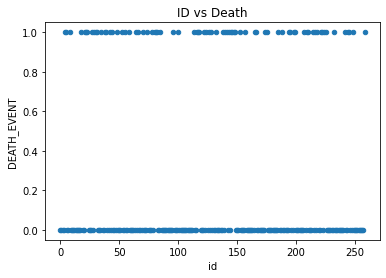

In [28]:
data.plot.scatter(y='DEATH_EVENT', x="id", title="ID vs Death")

m,_,r,p,_ = lr(data["id"], data["DEATH_EVENT"])
print("Slope = ", m, "\nR^2 = ", r**2, "\nP Val = ", p)

Let's also check ejection fraction just to be safe. Indeed, this is also a terrible predictor of death, so let's get rid of this one too.

Slope =  -0.00018856065367693276 
R^2 =  0.0009586251178843021 
P Val =  0.6199016792441308


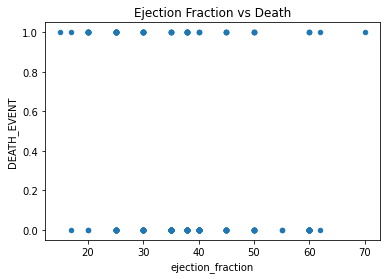

In [29]:
data.plot.scatter(y='DEATH_EVENT', x="ejection_fraction", title="Ejection Fraction vs Death")

m,_,r,p,_ = lr(data["id"], data["DEATH_EVENT"])
print("Slope = ", m, "\nR^2 = ", r**2, "\nP Val = ", p)

# Model Selection
Pick a model, whichever you choose! Train it up and see how it runs.

First, let's remove our dependent var and the bad predictors from earlier from our list of cols for the predictor data.

In [30]:
x_cols = list(data.columns)
x_cols.remove('DEATH_EVENT')
x_cols.remove('ejection_fraction')
x_cols.remove('id')

Next, we split our train and test data.

In [31]:
# Your code here
train, test = train_test_split(data, test_size=0.2)

Now we split the train and test data based on x and y, and convert everything to numpy arrays

In [32]:
x_train = train[x_cols].to_numpy()
y_train = train[['DEATH_EVENT']].to_numpy()
x_test = test[x_cols].to_numpy()
y_test = test[['DEATH_EVENT']].to_numpy()

We will now use an oversampling technique called SMOTE to create more data for our training set. This will correct the category imbalance we saw earlier.

In [33]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

We will use a Random Forest Classifier to train our model.

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model = make_pipeline(StandardScaler(with_mean=False), SVC(kernel='sigmoid', probability=True, class_weight='balanced', decision_function_shape='ovo'))

#model = DecisionTreeClassifier(max_depth=11)
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('svc',
                 SVC(class_weight='balanced', decision_function_shape='ovo',
                     kernel='sigmoid', probability=True))])

In [35]:
y_pred = model.predict(x_test)

# Testing Your Model
While we're assessing you specifically on the trace of your confusion matrix, you're still required to present your methodology. With that in mind, do not hesitate to use a variety of metrics to justify your choices.

In [36]:
### DO NOT MODIFY THIS CELL ###

import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confmat(true_labels, pred_labels):
  """
  Plots a confusion matrix from given data and returns its trace
  """
  fig2, ax = plt.subplots(1, 1, num=2, figsize=(10, 10))

  cm = confusion_matrix(true_labels, pred_labels)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the confusion matrix
  for pair in np.argwhere(np.isnan(cm_norm)):
    cm_norm[pair[0]][pair[1]] = 0
  cm_score = np.trace(cm_norm)

  annot = np.zeros_like(cm, dtype=object)
  for i in range(annot.shape[0]):  # Creates an annotation array for the heatmap
    for j in range(annot.shape[1]):
      annot[i][j] = f'{cm[i][j]}\n{round(cm_norm[i][j] * 100, ndigits=3)}%'

  ax = sns.heatmap(cm_norm, annot=annot, fmt='', cbar=True, cmap=plt.cm.magma, vmin=0, ax=ax) # plot the confusion matrix

  ax.set(title=f'CM Score = {cm_score}', xlabel='Predicted Label', ylabel='Actual Label')

  fig2.tight_layout()

  return cm_score

In [37]:
# Your code here
from sklearn.metrics import *

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.67      0.55      0.60        11

    accuracy                           0.85        52
   macro avg       0.78      0.74      0.75        52
weighted avg       0.84      0.85      0.84        52



1.4722838137472283

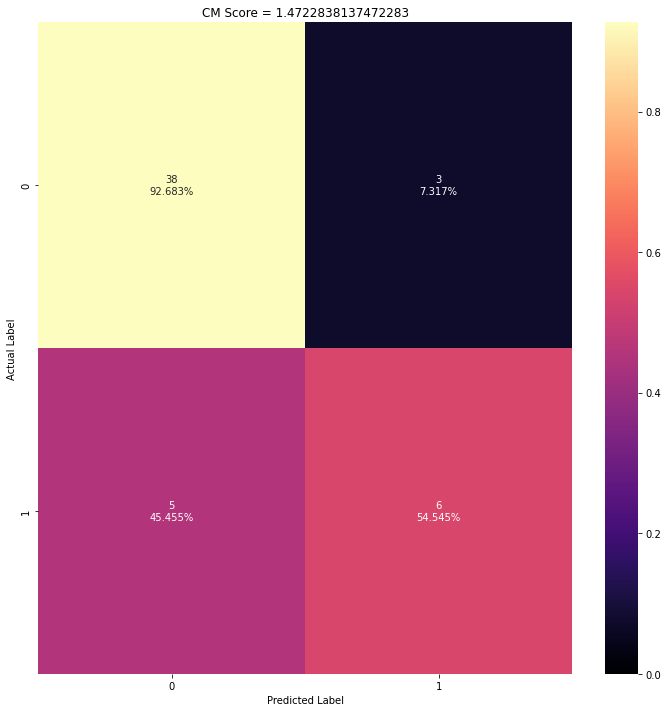

In [38]:
plot_confmat(y_test, y_pred)

In [39]:
x_valid = valid[x_cols].to_numpy()
y_vactual = valid[['DEATH_EVENT']].to_numpy()
y_vpred = model.predict(x_valid)
print(classification_report(y_vactual, y_vpred, zero_division=1))

              precision    recall  f1-score   support

           0       0.82      0.45      0.58        20
           1       0.62      0.90      0.73        20

    accuracy                           0.68        40
   macro avg       0.72      0.68      0.66        40
weighted avg       0.72      0.68      0.66        40



1.35

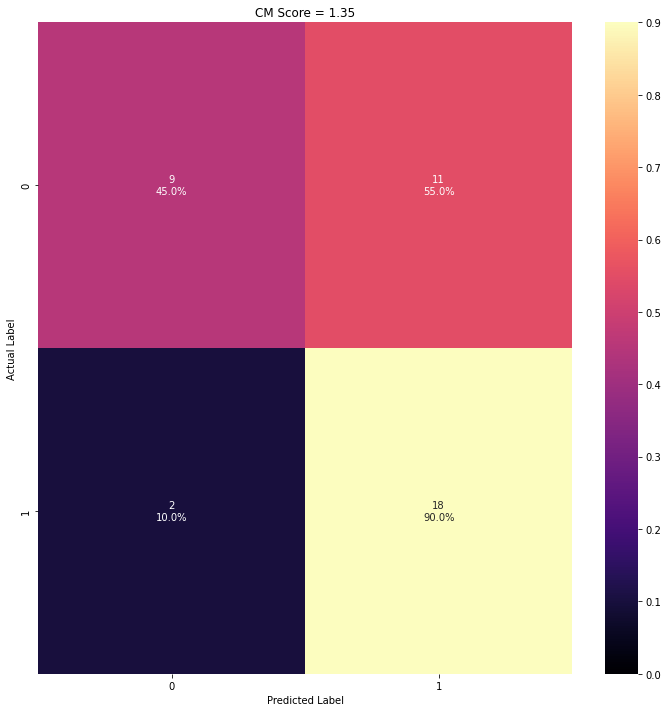

In [40]:
plot_confmat(y_vactual, y_vpred)

# Submission
Once you've made a final model that you're happy with, please save it out with the following function. You will then upload this notebook (as an ```.ipynb``` file) and the saved model file using [this form](https://forms.gle/aZudRC8t1e5ffqcPA).

NOTE: You only get one submission per team, so make sure that you're happy with everything before you submit the model. Also, while we'll take submissions that aren't pickle files (i.e. if you use a neural net or something), you have to figure out how to save it on your own.

In [41]:
import pickle

def save_model(model, filename):
  with open(f'{filename}.pkl', 'wb') as f:
    pickle.dump(model, f)
  
  print(f'Model saved to {filename}.pkl!')

In [42]:
save_model(model, 'sohamn')

Model saved to sohamn.pkl!
